In [8]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import keras.utils as image



(train_x,train_y), (test_x,test_y) =mnist.load_data()

#train_x = train_x.astype('float32') / 255
#test_x = test_x.astype('float32') / 255


'''print(train_x)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)'''


train_x = train_x.reshape(60000,784)
test_x = test_x.reshape(10000,784)


train_y = keras.utils.to_categorical(train_y,10)
test_y = keras.utils.to_categorical(test_y,10)


#Initialize our data ************

model = Sequential()
model.add(Dense(units=128,activation="relu",input_shape=(784,)))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=10,activation="softmax"))


#*** Compile the model **********


model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])


'''model.fit(train_x,train_y,batch_size=32,epochs=10,verbose=1)
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32)
print("Accuracy: ",accuracy[1])'''


#model.save("mnist-model.h5")

# load feautures after training our model
model.load_weights("mnist-model.h5")



img = image.load_img(path="crop_7_3.jpg",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape((1,784))


1/1 [==============================] - 0s 37ms/step
Class:  3


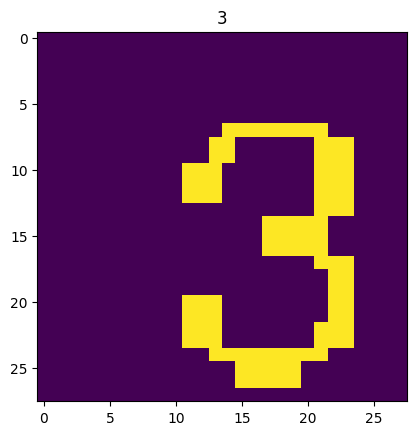

In [21]:
import numpy as np


predict_x=model.predict(test_img) 
classes_x=np.argmax(predict_x,axis=1)



classname = classes_x[0]
img = 255 - img
        #những giá trị nhỏ hơn 100 thì đặt bằng 0
img[img<100]=0
img[img>=100]=255
print("Class: ",classname)
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()

In [13]:
for i in range(9):
    list1=[]
    for j in range(9):
        img = image.load_img(path="crop_"+str(i)+"_"+str(j)+".jpg",grayscale=True,target_size=(28,28,1))
        img = image.img_to_array(img)
        #biến trắng thành đen và ngược lại
        img = 255 - img
        #những giá trị nhỏ hơn 100 thì đặt bằng 0
        img[img<100]=0
        img[img>=100]=255
        for i2 in range(28):
            for j2 in range(28):
                if i2==0 or i2==27 or j2==0 or j2==27:
                    img[i2][j2]=0
        test_img = img.reshape((1,784))
        predict_x=model.predict(test_img)
        classes_x=np.argmax(predict_x,axis=1)
        classname = classes_x[0]
        #nếu xác suất > 0.9 thì in ra kết quả
        if predict_x[0][classname]>0.5:
            list1.append(classname)
        else:
            list1.append('.')
    print(list1)
        

1/1 [==============================] - 0s 35ms/step
['.', 2, 2, '.', 3, 2, 3, 2, 3]
1/1 [==============================] - 0s 68ms/step
['.', 3, 3, 2, 3, 7, 3, 3, 3]
1/1 [==============================] - 0s 29ms/step
['.', 7, 3, '.', '.', 3, '.', 3, '.']
1/1 [==============================] - 0s 25ms/step
[7, 2, '.', 7, 2, 7, 2, '.', 2]
1/1 [==============================] - 0s 24ms/step
[3, '.', '.', 3, '.', 3, '.', '.', 3]
1/1 [==============================] - 0s 27ms/step
[7, 2, '.', 7, 2, 3, 2, '.', 9]
1/1 [==============================] - 0s 27ms/step
[3, '.', '.', 3, '.', 3, '.', 9, 2]
1/1 [==============================] - 0s 30ms/step
['.', 3, 2, 7, 2, '.', 9, 2, '.']
1/1 [==============================] - 0s 26ms/step
[9, 2, 9, 2, 7, 2, 3, 7, 2]


1/1 [==============================] - 0s 39ms/step


d:\new_program\Python\Python311\Lib\site-packages\keras\utils\image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


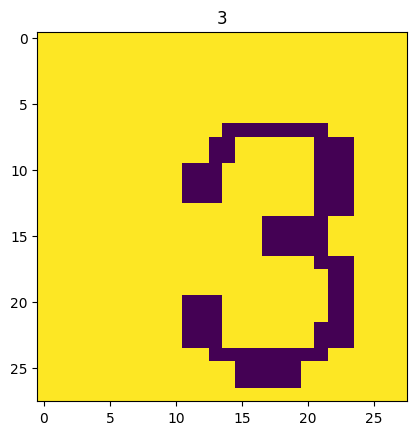

[[0.0000000e+00 1.4593253e-10 3.1301556e-15 1.0000000e+00 1.3184813e-32
  2.6316858e-15 3.0954425e-33 1.9216565e-21 5.6172955e-09 6.0240964e-25]]


In [26]:
#lấy ảnh 3.jpg ra test
img = image.load_img(path="3.jpg",grayscale=True,target_size=(28,28,1))


img = image.img_to_array(img)
img = 255-  img
img[img<100]=0
img[img>=100]=255
test_img = img.reshape((1,784))
predict_x=model.predict(test_img)
classes_x=np.argmax(predict_x,axis=1)
classname = classes_x[0]
img = img.reshape((28,28))
plt.imshow(img)
plt.title(classname)
plt.show()
img[0,0]
#in ra xác suất của các số
print(predict_x)

In [2]:
#dùng pytesseract để nhận dạng chữ
import pytesseract
from PIL import Image
img = Image.open('3.jpg')
#path tesseract
pytesseract.pytesseract.tesseract_cmd = r'D:\new_program\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(img,lang='eng')
print(text)